# Cohort Project - Supplemental - $H_2$ Ising Hamiltonian solver

> Implementing a molecular ground state energy calculator, with $H_2$ as the primary example. This demonstrates a method for finding the exact mapping between the electronic structure Hamiltonian and the Ising Hamilitonain. The key part of this work is leveraged from this paper [arXiv:1611.01068v1 [quant-ph] 3 Nov 2016](https://arxiv.org/pdf/1611.01068.pdf)





## Summary

Authors of the [paper](https://arxiv.org/pdf/1611.01068.pdf) have provided a method to express the calculation of the $H_2$ molecule ground state energy as a two-body Ising Hamiltonian. 

The DWave Quantum Annealer is designed for solving Ising Hamiltonians. 

This implementation attempts to follow the recipe laid out in Supplemental Material (page 6 - para. 1 Detailed Procedure ) which refer to the  formulas (4), (5), (6) and (7). Table I (page 7) is represented in the data file H2_coefficients_exact_simulated.csv which we use to compute the simulated energy to compare to the exact energy, and thus validate the computation.


# Experimenting for $H_2$ Energy Calculations

## Implementing Hamiltonian for calculating $H_2$ Energies








### Outcome

At this stage the results do not match the target exact numbers provided. The code will need reviewing to verify the application of the recipe. 

One peculiar outcome is that results obtained for row N strangely coincide with the target on row N+1. If the code is considered correct, one might need to have the data Table I in the paper validated to ensure the energies indicated are indeed associated with the correct coefficients for the given molecular distance on each row.

See results under the "Process" header further below.


## Procedure


### Excerpt from the paper

We can use this symmetry to reduce the
Hamiltonian to the following effective Hamiltonian, acting only on two qubits:

>(4) $H_{H_2}=g_01+g_1σ_{z}^{0}+g_2σ_{z}^{1}+g_3σ_{z}^{0}σ_{z}^{1}+g_4σ_{x}^{0}σ_{x}^{1}+g_4σ_{y}^{0}σ_{y}^{1}$ 
>$=g_01+H_0$    

>(5) $H_0=g_1σ_{z}^{0}+g_2σ_{z}^{1}+g_3σ_{z}^{0}σ_{z}^{1}+g_4σ_{x}^{0}σ_{x}^{1}+g_4σ_{y}^{0}σ_{y}^{1}$         

By squaring the Hamiltonian $H_0$ and modifying it, one can get a new Ising Hamiltonian:

>(6) $H_1=H_{0}^2 + 2g_3H_0=a_1+a_2(σ_{z}^{0}+σ_{z}^{1}) +a_3σ_{z}^{0}σ_{z}^{1}$

With:  

>(7) 

>$a_1=g_1^2+g_2^2+g_3^2+ 2g_4^2$ 

>$a_2 = 2(g_1+g_2)g_3$ 

>$a_3= 2(g_1g_2−g_4^2+g_3^2)$



Here we present steps to get the ground state of $H_{H_2}$ by using the new Ising Hamiltonian H1 (Eq.6).
1. If $|g_1| + |g_2| + |g_4| < |g_3|$ start computing by $H_1$ and get the result $Y$ . Otherwise increase $|g_3|$ by
$|g_1| + |g_2| + |g_4|$ and start computing.
2. Solve equation $x2 + 2g3x = Y$ and get $σ_x^1$ and $σ_x^2$  $(σ_x^1<= σ_x^2)$. Add $|g_1| + |g_2| + |g_4|$ to $σ_x^1$
 if added to $g_3$ before (we just assume $g_3 > 0$.) Compare $σ_x^1$ with $g_3 − g_1 − g_2$ (or $g_3 + g_1 + g_2$) to get the ground state of $H_0$. Add $g_0$ to get the ground state of $H_{H_2}$.


# Code

## Toolkit installation

In [ ]:
!pip install dwave-ocean-sdk

Now we import our libraries and define the sampler. Adapating this to work on different QPU's is only a matter of setting the sampler to the desired device. 

In [1]:
from quantum_H2_ising import GroundStateEnergy

## Class for $H_2$ energy calculation

Loads the table file included in the source paper.

Calculates the ground state energy given one set of coefficients (one row)
from the table

In [2]:
H2 = GroundStateEnergy('H2_coefficients_exact_simulated.csv')

[0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5, 1.55, 1.6, 1.65, 1.7, 1.75, 1.8, 1.85, 1.9, 1.95, 2.0, 2.05, 2.1, 2.15, 2.2, 2.25, 2.3, 2.35, 2.4, 2.45, 2.5, 2.55, 2.6, 2.65, 2.7, 2.75, 2.8, 2.85, 2.9, 2.95, 3.0, 3.05, 3.1]


## Process the table and calculate the $H_2$ ground states

In [3]:
data = H2.data()
isingList = []
exactList = []
quboList = []
samples = 50

#for row in range(len(data)):
#    R,g0,g1,g2,g3,g4,exact,sim = data[row]
count = 0
for R in H2.get_available_R():
   
    exact = H2.get_g_values(R)['e']
    
    HH2_i = H2.solve_ising(R, samples, exact, False, useQPU=False)
    HH2_q = H2.solve_qubo(R, samples, exact, False, useQPU=False)
    
    exactList.append(exact)
    isingList.append(HH2_i)
    quboList.append(HH2_q)
    
    if count % 10 == 0: 
        print("\nSolving for R = %f" % (R))
        print("Energy via exact solution = %f," % (exact))
        print("Energy via qubo           = %f," % (HH2_q))
        print("Energy via ising          = %f" % (HH2_i))
        
    count += 1


Solving for R = 0.600000
Energy via exact solution = -0.687700,
Energy via qubo           = -0.687590,
Energy via ising          = -0.687590

Solving for R = 1.100000
Energy via exact solution = -1.118600,
Energy via qubo           = -1.118394,
Energy via ising          = -1.118394

Solving for R = 1.600000
Energy via exact solution = -1.137100,
Energy via qubo           = -1.137050,
Energy via ising          = -1.137050

Solving for R = 2.100000
Energy via exact solution = -1.084200,
Energy via qubo           = -1.084041,
Energy via ising          = -1.084041

Solving for R = 2.600000
Energy via exact solution = -1.028000,
Energy via qubo           = -1.027897,
Energy via ising          = -1.027897

Solving for R = 3.100000
Energy via exact solution = -0.990300,
Energy via qubo           = -0.986790,
Energy via ising          = -0.986790


## Plot the results

<IPython.core.display.Javascript object>


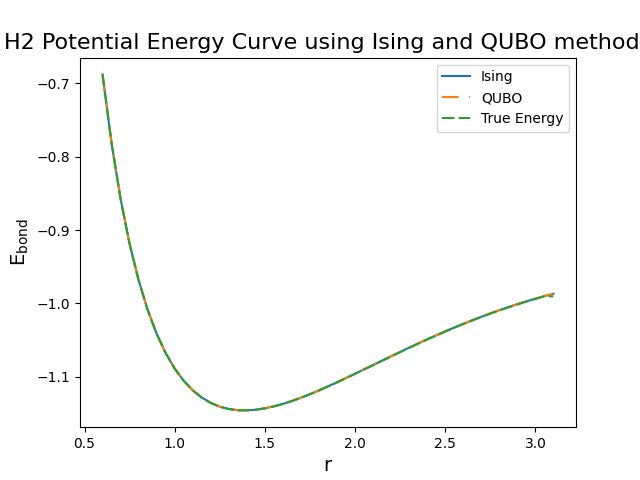

In [4]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
r = np.array(range(60,315,5)) / 100.0 

#Define plots
ising_plot = ax.plot(r, isingList, label='Ising')
qubo_plot = ax.plot(r, quboList, dashes=[8, 5], label='QUBO')
true_plot = ax.plot(r, exactList, dashes=[6, 2], label='True Energy')

#Text formating
params = {'mathtext.default': 'regular' }  
plt.rcParams.update(params)
plt.xlabel('$r$', fontsize=14)
y = plt.ylabel('$E_{bond}$', fontsize=14)
plt.title('H2 Potential Energy Curve using Ising and QUBO methods', fontsize=16)

ax.legend()
plt.show()

We can now zoom in to a subset of the data to see how close the solvers are to the exact values. Viewing this subset, the difference is more noticable but still very accurate.

<IPython.core.display.Javascript object>


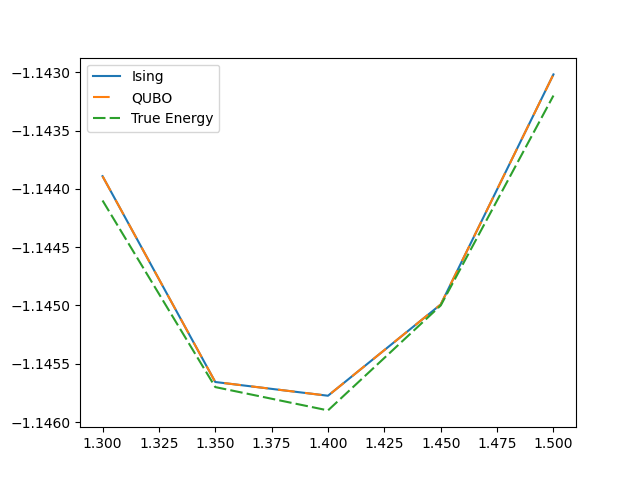

In [5]:
fig_f, ax_f = plt.subplots()

#Choose a, b values to plot a subset of the data
a = 14
b = 19
ising_f= ax_f.plot(r[a:b], isingList[a:b], label='Ising')
rbm_plot = ax_f.plot(r[a:b], quboList[a:b], dashes=[8, 5], label='QUBO')
true_plot = ax_f.plot(r[a:b], exactList[a:b], dashes=[6, 2], label='True Energy')

ax_f.legend()
plt.show()